# UMAP of Microbial Datasets in Building Materials

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

'''May require command line installation of umap package by running the following line:
    conda install umap-learn'''
import umap

%matplotlib inline

## File Format Requirements:

1. If ".biom" file, use the following link to convert to txt file: https://biom-format.org/documentation/biom_conversion.html

2. If ".txt" file, use the following code snippet to convert to csv file:
    
    import csv
    with open('ITS-metadata-withcounts.txt', 'r') as in_file:
        stripped = (line.strip() for line in in_file)
        lines = (line.split(",") for line in stripped if line)
        with open('ITS_metadata.csv', 'w') as out_file:
            writer = csv.writer(out_file)
            writer.writerows(lines)
            
3. If ".csv" or ".tsv", you cannot have a header (it will mess up the conversion to an OTU table)


## UMAP analysis of 16S OTU dataset

Cannot have header in CSV or TSV file, will mess up the conversion to OTU table

CONVERT FROM BIOM: https://biom-format.org/documentation/biom_conversion.html

In [4]:
from sklearn import preprocessing

# Formatting CLR transformed data file
file_loc1 = "2020-07-28_clorox_16S_OTU_genus_clr_Tabl_zcomp.csv"
OTU_table = pd.read_csv(file_loc1)
OTU_table = OTU_table.set_index("Unnamed: 0")

# Might have to coerce column names to be of type float
OTU_table = OTU_table.T
OTU_table

Unnamed: 0,Abiotrophia,Acholeplasma,Acinetobacter,Actinobacillus,Actinomyces,Aerococcus,Aggregatibacter,Alicyclobacillus,Arthrobacter,Atopobium,...,Sphingobium,Sphingomonas,Staphylococcus,Streptobacillus,Streptococcus,Tannerella,TG5,Treponema,Veillonella,Wolinella
1.1.By,1.974981,-2.329084,-0.537324,-0.942789,5.204610,-2.329084,2.896663,-2.329084,-2.329084,-1.635937,...,-2.329084,-2.329084,-2.329084,-2.329084,5.622476,4.081091,0.443505,2.818411,5.295535,-2.329084
1.1.Bz,3.377319,-0.511094,-2.996001,-1.609706,3.810829,-2.996001,1.193654,-2.302854,-1.609706,-1.609706,...,-2.302854,-2.996001,-2.302854,-2.302854,5.171351,4.249654,4.208892,6.077144,4.051517,0.741669
1.1.pa,2.012843,-1.354453,-1.354453,-1.354453,5.274911,-2.047600,4.122011,-2.047600,-1.354453,0.591457,...,-2.047600,-2.047600,-0.661306,-2.047600,6.068519,4.122011,-2.047600,1.210497,5.270940,-2.047600
1.2.Bx,1.582105,-0.800523,-1.899135,-3.285429,4.034436,-3.285429,0.703555,-0.800523,-3.285429,3.386604,...,-3.285429,-3.285429,-2.592282,-3.285429,5.422054,3.610253,3.060207,4.670346,3.638199,-2.592282
1.2.Bz,2.477722,-0.355491,-0.019019,-2.658076,3.194126,-2.658076,1.079594,-0.173169,-1.271782,-1.964929,...,-0.578634,-2.658076,-1.964929,-2.658076,5.536706,3.260818,2.788661,5.016077,3.222457,-0.578634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.2.Bz,-0.034834,-0.034834,-0.034834,-0.034834,-0.034834,-0.034834,-0.034834,-0.034834,-0.034834,-0.034834,...,-0.034834,-0.034834,-0.034834,-0.034834,-0.034834,-0.034834,-0.034834,-0.034834,-0.034834,-0.034834
22.2.By,-0.008060,-0.008060,-0.008060,-0.008060,-0.008060,-0.008060,-0.008060,-0.008060,-0.008060,-0.008060,...,-0.008060,-0.008060,-0.008060,-0.008060,-0.008060,-0.008060,-0.008060,-0.008060,-0.008060,-0.008060
26.2.Bx,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20.2.By,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
# Mapping table w/ features of interest 
file_loc2 = "2020-07-28_clorox_mappingfile.csv"

OTU_map_table = pd.read_csv(file_loc2)
OTU_map_table = OTU_map_table.set_index("Unnamed: 0")
OTU_map_table

,BarcodeSequence,LinkerPrimerSequence,center_name,experiment_design_description,instrument_model,library_construction_protocol,linker,platform,run_date,run_prefix,...,surface_long,taxon_id,time,timepoint,title,tooth_sampled,tooth_sampled_long,tx_ctl,Description,metab_description
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1.1.Bx,TGGAGCCTTGTC,CCGGACTACHVGGGTWTCTAAT,clorox_perio,samples of material from the gingival crevice ...,Illumina MiSeq,Illumina V4 EMP,CC,Illumina,6/19/14,6_19_14_S0_L001,...,disto-buccal,447426,1,1,Meta-omics analysis of periodontal pocket micr...,14DB,upper left first molar,T,1.1.Bx,1.1Bx
1.1.By,CTCGATGTAAGC,CCGGACTACHVGGGTWTCTAAT,clorox_perio,samples of material from the gingival crevice ...,Illumina MiSeq,Illumina V4 EMP,CC,Illumina,6/19/14,6_19_14_S0_L001,...,disto-lingual,447426,1,1,Meta-omics analysis of periodontal pocket micr...,3DL,upper right first molar,T,1.1.By,1.1By
1.1.Bz,AGCTTCGACAGT,CCGGACTACHVGGGTWTCTAAT,clorox_perio,samples of material from the gingival crevice ...,Illumina MiSeq,Illumina V4 EMP,CC,Illumina,6/19/14,6_19_14_S0_L001,...,disto-buccal,447426,1,1,Meta-omics analysis of periodontal pocket micr...,22DB,lower left canine,T,1.1.Bz,1.1Bz
1.1.Pa,ATACGCATCAAG,CCGGACTACHVGGGTWTCTAAT,clorox_perio,samples of material from the gingival crevice ...,Illumina MiSeq,Illumina V4 EMP,CC,Illumina,6/19/14,6_19_14_S0_L001,...,Missing: Not provided,447426,1,1,Meta-omics analysis of periodontal pocket micr...,Missing: Not provided,Missing: Not provided,T,1.1.Pa,1.1Pa
1.2.Bx,AGATGTCCGTCA,CCGGACTACHVGGGTWTCTAAT,clorox_perio,samples of material from the gingival crevice ...,Illumina MiSeq,Illumina V4 EMP,CC,Illumina,6/19/14,6_19_14_S0_L001,...,disto-buccal,447426,2,2,Meta-omics aMissing: Not providedlysis of peri...,14DB,upper left first molar,T,1.2.Bx,1.2Bx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.1.Pa,AACGAGGCAACG,CCGGACTACHVGGGTWTCTAAT,clorox_perio,samples of material from the gingival crevice ...,Illumina MiSeq,Illumina V4 EMP,CC,Illumina,6/19/14,6_19_14_S0_L001,...,Missing: Not provided,447426,1,1,Meta-omics analysis of periodontal pocket micr...,Missing: Not provided,Missing: Not provided,C,9.1.Pa,9.1Pa
9.2.Bx,GAAGACAGCGAC,CCGGACTACHVGGGTWTCTAAT,clorox_perio,samples of material from the gingival crevice ...,Illumina MiSeq,Illumina V4 EMP,CC,Illumina,6/19/14,6_19_14_S0_L001,...,disto-buccal,447426,2,2,Meta-omics analysis of periodontal pocket micr...,19DB,lower left first molar,C,9.2.Bx,9.2Bx
9.2.By,ACACCTGCGATC,CCGGACTACHVGGGTWTCTAAT,clorox_perio,samples of material from the gingival crevice ...,Illumina MiSeq,Illumina V4 EMP,CC,Illumina,6/19/14,6_19_14_S0_L001,...,disto-buccal,447426,2,2,Meta-omics analysis of periodontal pocket micr...,24DB,lower left central incisor,C,9.2.By,9.2By


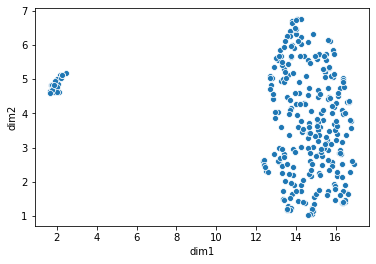

In [6]:
reducer = umap.UMAP(n_components = 2, n_neighbors = 20, metric = 'euclidean', random_state = 0, min_dist = 0.1)
embeddings = reducer.fit_transform(OTU_table)
plot_samples = pd.DataFrame(data = embeddings, columns = ['dim1', 'dim2'], index = OTU_table.index)

# Unlabeled UMAP
sns.scatterplot(x = 'dim1', y = 'dim2', data = plot_samples)

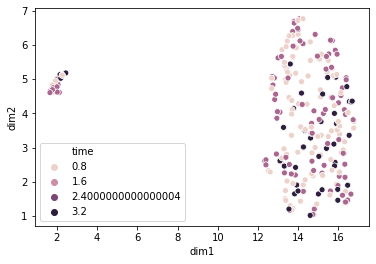

In [7]:
plot_samples = pd.concat([plot_samples, OTU_map_table['time']], axis = 1, sort=False)

# Labeled UMAP
sns.scatterplot(x = 'dim1', y = 'dim2', hue = 'time', data = plot_samples)

## UMAP analysis of cytokine dataset

In [12]:
# Formatting CLR transformed data file
file_loc5 = "2020-07-12_cyto_clr_table_zcomp.csv"
cyto_table = pd.read_csv(file_loc5)

cyto_table = cyto_table.set_index("Unnamed: 0")
cyto_table = cyto_table.T

cyto_table

Unnamed: 0,[CRP] mg/L,[cTnI] pg/mL,[TNFα] pg/mL,[IL-10] pg/mL,[IL-6] pg/mL,[IFNɣ] pg/mL,[IL-1β] pg/mL,IL6/IL10
001A,-0.504648,0.046529,0.312797,0.446328,0.917752,-0.534501,-1.728423,1.044165
001B,-0.152774,-0.586410,0.678523,0.214950,0.855454,-0.676023,-1.433708,1.099989
006A,0.341824,-0.122482,1.335076,1.149575,-0.243110,-0.505474,-1.267614,-0.687795
006B,0.933126,1.237615,0.771604,0.376050,-0.519743,-1.064970,-0.693406,-1.040277
007A,-0.094628,0.551999,1.104789,0.866115,-0.072155,-0.659942,-1.480922,-0.215256
...,...,...,...,...,...,...,...,...
087B,0.335637,-0.308239,1.053723,0.097226,0.502691,-0.475293,-1.956898,0.751153
088A,0.710779,0.552089,1.245236,0.506478,-0.314502,-0.654009,-1.326103,-0.719967
089A,0.110936,0.884741,0.910243,0.180462,0.319575,-0.606504,-1.827006,0.027554
089B,0.267627,1.638996,1.264985,0.149844,-0.333583,-0.478765,-1.998591,-0.510514


In [13]:
# Mapping table w/ features of interest
file_loc6 = "all76narch_map.txt.csv"

cyto_map_table = pd.read_csv(file_loc6)
cyto_map_table = cyto_map_table.set_index("SampleID")
cyto_map_table

,BarcodeSequence,LinkerPrimerSequence,Source,PocketClass,PerioTreatment,AvgPocketDepth,PocketCategory,OverallResponse,SpecificResponse,Sex,...,PocketReClass,PDsum,Deep3,SNP1,ACh1,SNP5,ACh5,SNP10,ACh10,Description
SampleID,,,,,,,,,,,,,,,,,,,,,
001A,CTGTTCGTAGAG,CATGCTGCCTCCCGTAGGAGT,NARCH,Severe Disease,Pre,2.7,2,Same,Improved,Female,...,Moderate Disease,141,34,3721,6304,19798,23095,36331,30621,NARCH_sample_001A
001B,CTTAGCACATCA,CATGCTGCCTCCCGTAGGAGT,NARCH,Moderate Disease,Post,2.7,2,Same,Improved,NaN,...,Moderate Disease,52,13,7330,2629,40982,10137,83242,15122,NARCH_sample_001B
006A,CTTGATGCGTAT,CATGCTGCCTCCCGTAGGAGT,NARCH,Moderate Disease,Pre,2.5,2,Improved,Improved,Female,...,Moderate Disease,16,4,3955,4337,30677,12310,63300,18899,NARCH_sample_006A
006B,CTTGTGTCGATA,CATGCTGCCTCCCGTAGGAGT,NARCH,Moderate Disease,Post,2.4,2,Improved,Improved,NaN,...,Moderate Disease,12,3,3360,8651,27215,28173,71381,42258,NARCH_sample_006B
007A,GACGAGTCAGTC,CATGCTGCCTCCCGTAGGAGT,NARCH,Normal,Pre,2.4,2,Same,Same,Female,...,Normal Disease,0,0,10454,15014,57777,72016,108300,121811,NARCH_sample_007A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
065A,GAAGTCTCGCAT,CATGCTGCCTCCCGTAGGAGT,NARCH,Moderate Disease,Pre,2.4,2,Worsened,Improved,Female,...,Moderate Disease,36,9,3027,6043,13025,22859,19303,35456,NARCH_sample_065A
065B,GAATGATGAGTG,CATGCTGCCTCCCGTAGGAGT,NARCH,Moderate Disease,Post,2.7,2,Worsened,Improved,NaN,...,Moderate Disease,108,27,1515,5079,9286,22383,15468,37021,NARCH_sample_065B
068A,GACAGGAGATAG,CATGCTGCCTCCCGTAGGAGT,NARCH,Severe Disease,Pre,2.2,2,Worsened,Worsened,Male,...,Severe Disease,26,6,4033,8568,20392,42232,36234,73272,NARCH_sample_068A


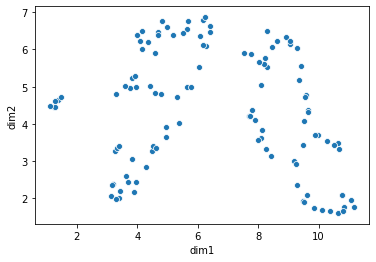

In [17]:
reducer = umap.UMAP(n_components = 2, n_neighbors = 5, metric = 'euclidean', random_state = 0, min_dist = 0.1)
embeddings = reducer.fit_transform(cyto_table)
plot_samples = pd.DataFrame(data = embeddings, columns = ['dim1', 'dim2'], index = cyto_table.index)

# Unlabeled UMAP
sns.scatterplot(x = 'dim1', y = 'dim2', data = plot_samples)

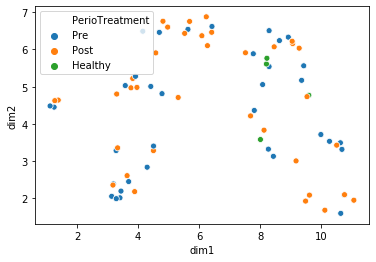

In [18]:
plot_samples = pd.concat([plot_samples, cyto_map_table['PerioTreatment']], axis = 1, sort=False)

# Labeled UMAP
sns.scatterplot(x = 'dim1', y = 'dim2', hue = 'PerioTreatment', data = plot_samples)